In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\ecommerce_customer_data_large_cleaned.csv')

data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                250000 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Gender                 250000 non-null  object 
 11  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 22.9+ MB


(None,
    Customer ID        Purchase Date Product Category  Product Price  Quantity  \
 0        44605  2023-05-03 21:30:02             Home            177         1   
 1        44605  2021-05-16 13:57:44      Electronics            174         3   
 2        44605  2020-07-13 06:16:57            Books            413         1   
 3        44605  2023-01-17 13:14:36      Electronics            396         3   
 4        44605  2021-05-01 11:29:27            Books            259         4   
 
    Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
 0                   2427         PayPal            31      1.0   John Rivera   
 1                   2448         PayPal            31      1.0   John Rivera   
 2                   2345    Credit Card            31      1.0   John Rivera   
 3                    937           Cash            31      0.0   John Rivera   
 4                   2598         PayPal            31      1.0   John Rivera   
 
    Gender 

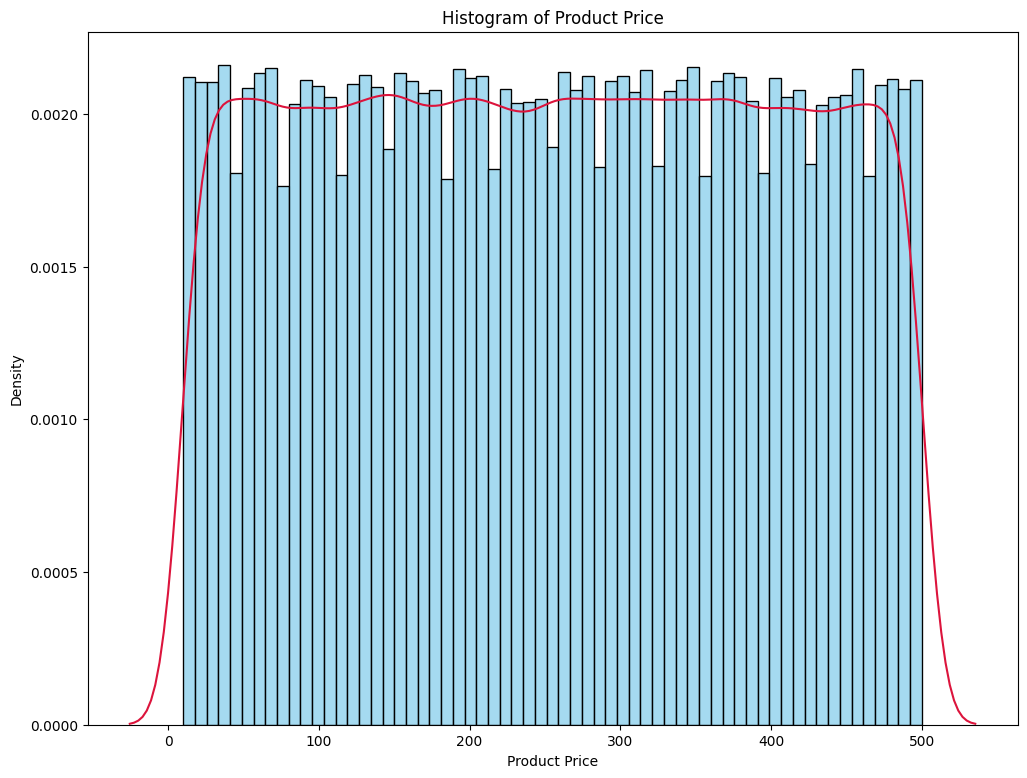

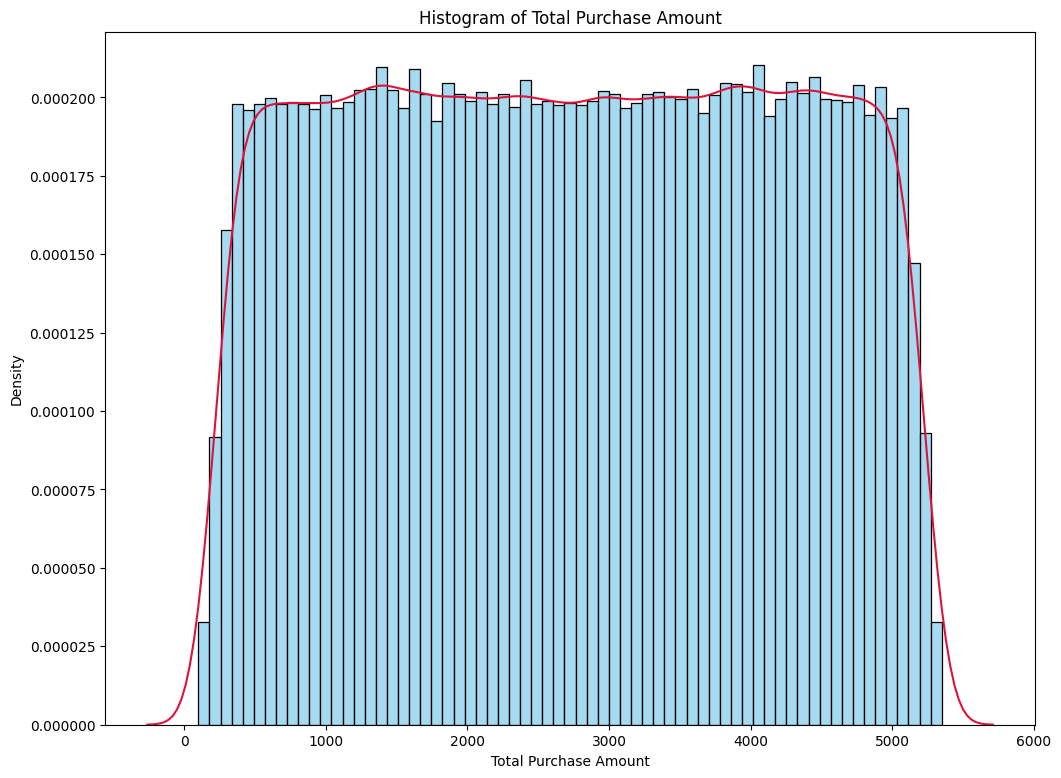

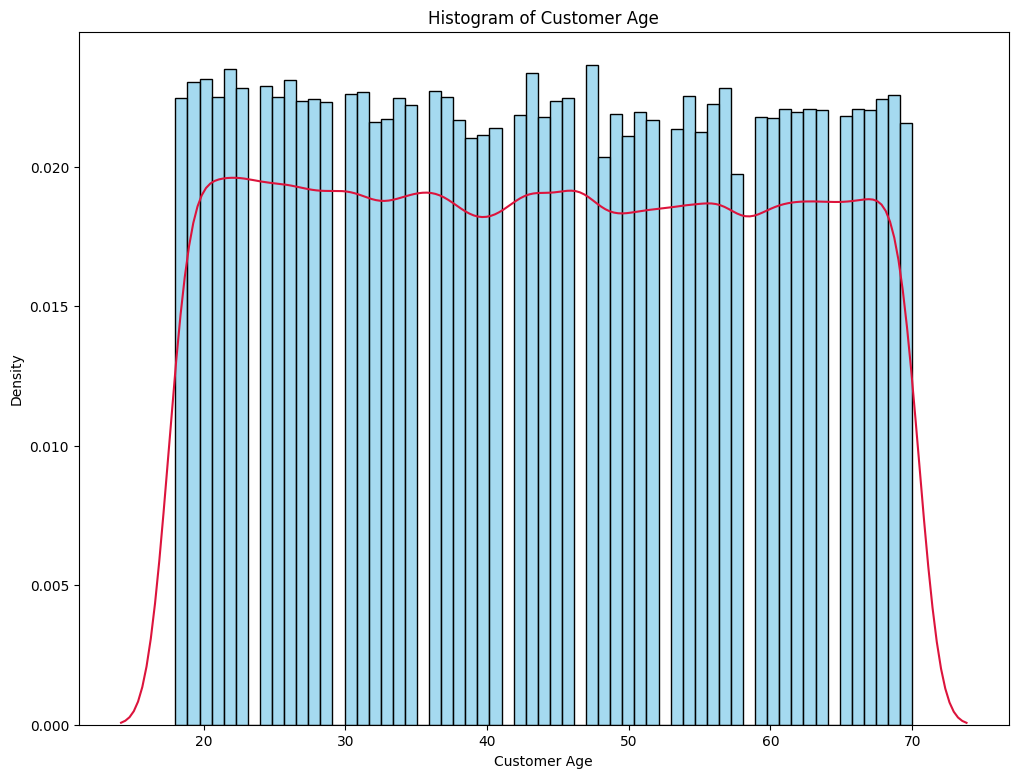

In [17]:
kinda_continuous = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer ID', 'Quantity', 'Returns', 'Churn'])

for col in kinda_continuous.columns:
  plt.figure(figsize=(12,9))
  ax = sns.histplot(kinda_continuous, x=col, color='skyblue', kde=False, stat='density')
  sns.kdeplot(kinda_continuous,x=col, color='crimson', ax=ax)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Density')

  plt.show()

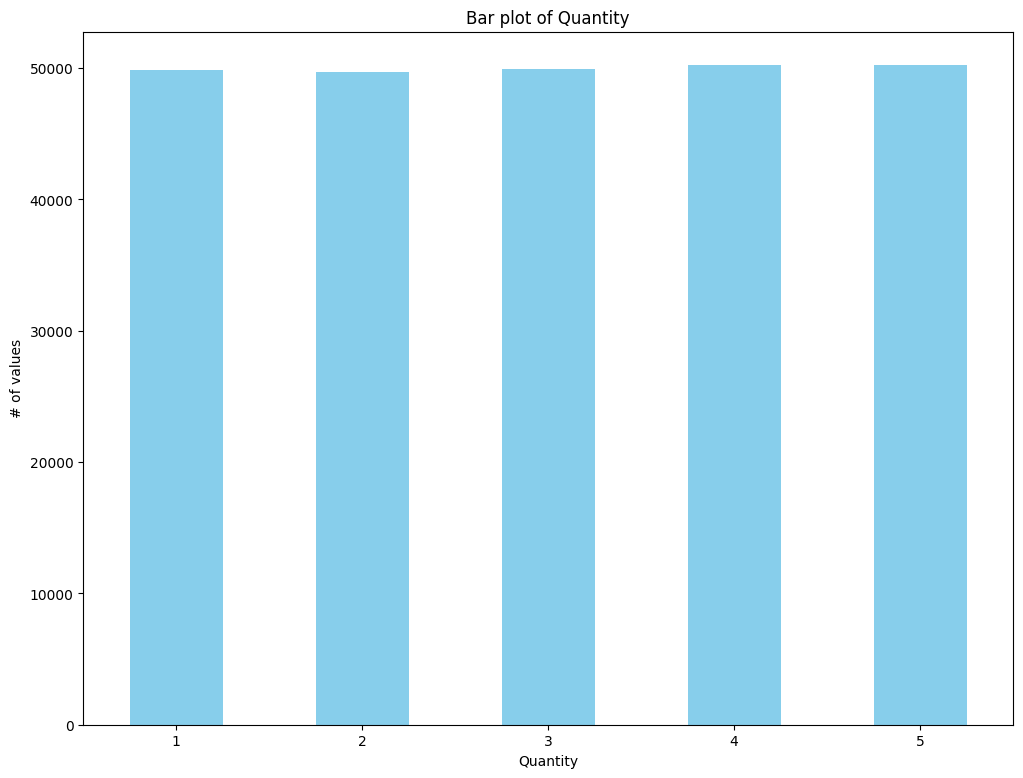

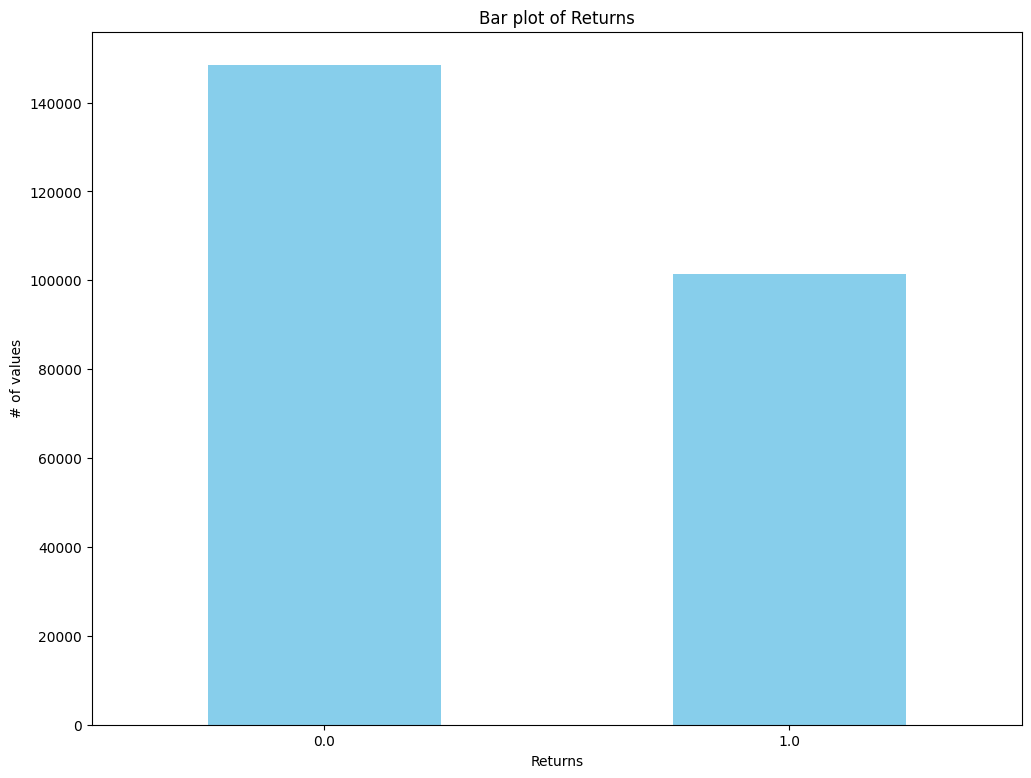

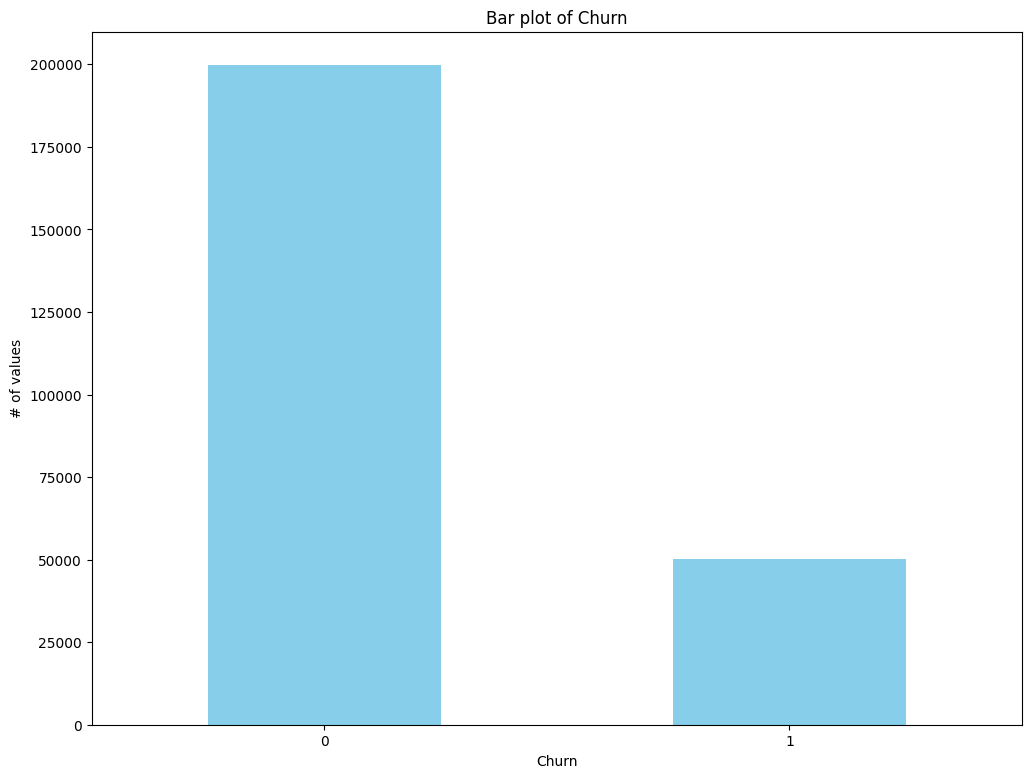

In [16]:
why_would_you_draw_a_histogram_for_these_columns = data[['Quantity', 'Returns', 'Churn']]

for col in why_would_you_draw_a_histogram_for_these_columns.columns:
  plt.figure(figsize=(12,9))
  why_would_you_draw_a_histogram_for_these_columns[col].value_counts().sort_index().plot(kind='bar', color='skyblue')
  plt.title(f'Bar plot of {col}')
  plt.xlabel(col)
  plt.xticks(rotation=0)
  plt.ylabel('# of values')

  plt.show()

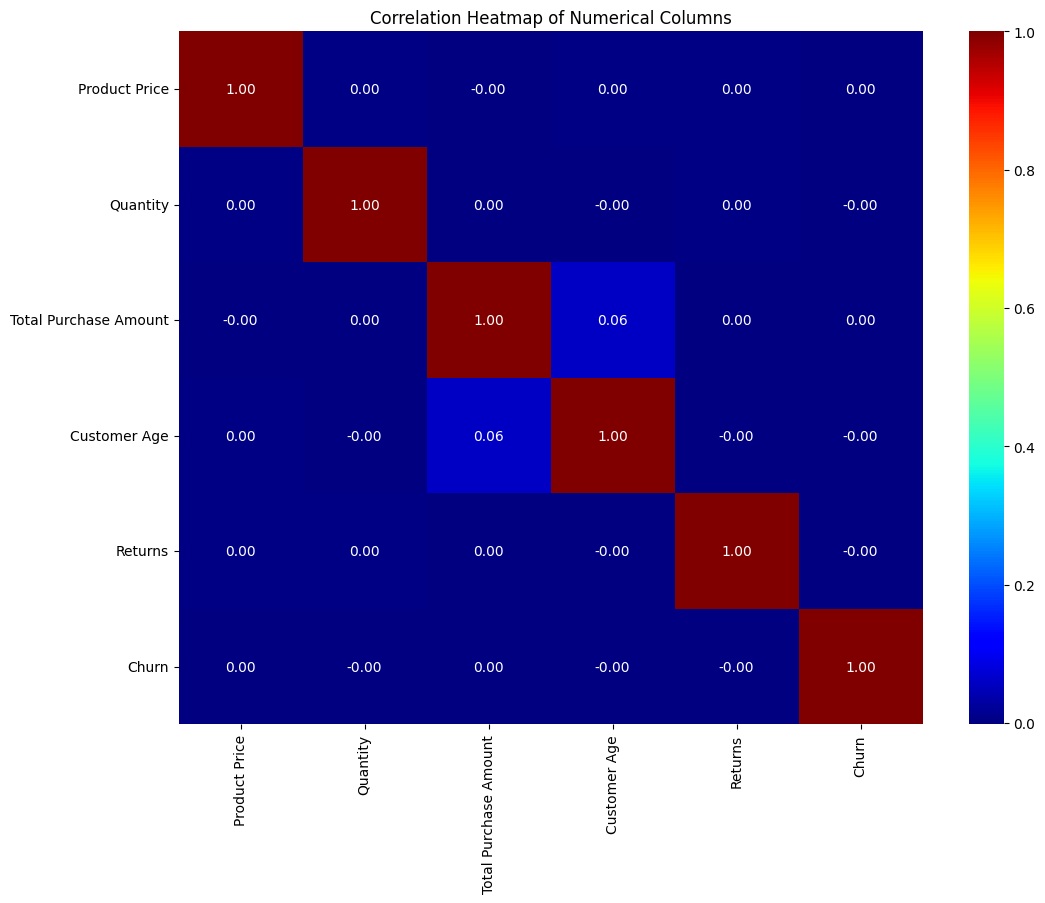

In [28]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer ID'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()